# Team 6 - World Cup

![](https://img.fifa.com/image/upload/t_l4/v1543921822/ex1ksdevyxwsgu7rzdv6.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/abecklas/fifa-world-cup)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Is there a way to integrate the data from all 3 datasets?
- It seems like the `winners` dataset doesn't have data of World Cup 2018. Can you Google the relevant information and add it to the dataset using `pandas`?
- The format of some number columns in `matches` dataset doesn't look right.
- Can you seperate the Date and the Time of `Datetime` column in `matches` dataset?
- And more...

# link GDS: https://datastudio.google.com/reporting/1eGVb36_W_pDFpGM3N13B1l3EF_3HpR8-/page/VzJx/edit

In [1]:
# Start your codes here!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Import DATA

In [2]:
import os
dir=os.getcwd()
matches=pd.read_csv(dir+'/matches.csv')
player=pd.read_csv(dir+'/players.csv')
winners=pd.read_csv(dir+'/winners.csv')

## Exploratory Data
- data.head()
- data.columns
- data.shape
- data.describe()
- data.corr()
- data. info


### matches dataset

In [3]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


###### How many entries in here

In [4]:
matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [5]:
matches.shape

(4572, 20)

In [6]:
matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


###### Correclation between ....

In [7]:
matches.corr()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
Year,1.000000,-0.381332,0.075339,0.314698,-0.288909,0.020934,0.343106,0.636591
Home Team Goals,-0.381332,1.000000,0.012474,-0.117751,0.729536,-0.009530,-0.110075,-0.196100
Away Team Goals,0.075339,0.012474,1.000000,-0.029801,-0.006304,0.693780,-0.005345,0.082687
Attendance,0.314698,-0.117751,-0.029801,1.000000,-0.126756,-0.037136,0.069394,0.164686
Half-time Home Goals,-0.288909,0.729536,-0.006304,-0.126756,1.000000,0.022204,-0.055303,-0.166201
Half-time Away Goals,0.020934,-0.009530,0.693780,-0.037136,0.022204,1.000000,0.011980,0.059456
RoundID,0.343106,-0.110075,-0.005345,0.069394,-0.055303,0.011980,1.000000,0.071549
MatchID,0.636591,-0.196100,0.082687,0.164686,-0.166201,0.059456,0.071549,1.000000


### Player dataset

In [8]:
player.head()
#line-up có nghĩa là đá chính hoặc dự bị

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [9]:
player.columns

Index(['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up',
       'Shirt Number', 'Player Name', 'Position', 'Event'],
      dtype='object')

In [10]:
player.shape

(37784, 9)

In [11]:
player.describe()

,RoundID,MatchID,Shirt Number
count,3.778400e+04,3.778400e+04,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022
std,2.770144e+07,1.123916e+08,6.960138
min,2.010000e+02,2.500000e+01,0.000000
25%,2.630000e+02,1.199000e+03,5.000000
50%,3.370000e+02,2.216000e+03,11.000000
75%,2.559310e+05,9.741000e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000


In [12]:
player.corr()

,RoundID,MatchID,Shirt Number
RoundID,1.000000,0.064068,0.072988
MatchID,0.064068,1.000000,0.103669
Shirt Number,0.072988,0.103669,1.000000


### Winner dataset

In [15]:
winners.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [16]:
winners.columns

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')

In [17]:
winners.shape

(20, 10)

In [18]:
winners.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


In [19]:
winners.corr()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
Year,1.000000,0.829886,0.895565,0.972473
GoalsScored,0.829886,1.000000,0.866201,0.876201
QualifiedTeams,0.895565,0.866201,1.000000,0.949164
MatchesPlayed,0.972473,0.876201,0.949164,1.000000


# Clear data

###  Winner dataset 

#### Add infor of WC2018 winner into Winner datase

In [13]:
#convert 'Attendance to nummeric'
winners['Attendance']=pd.to_numeric(winners['Attendance'].str.replace('.',''))

In [14]:
infor=['2018','Russia','France','Croatia','Belgium','England',169,32,64,1700000]
winners=winners.append(pd.Series(infor, index= winners.columns),ignore_index=True)
winners

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753


In [15]:
winners.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

### There are definitely some duplication of Name of GERMANY team, example Germany and Germany FR 
####  We need to transform them into one format

In [16]:
winners['Country']=winners['Country'].apply(lambda x: x.split()[0])
winners['Winner']=winners['Winner'].apply(lambda x: x.split()[0])
winners['Runners-Up']=winners['Runners-Up'].apply(lambda x: x.split()[0])
winners['Third']=winners['Third'].apply(lambda x: x.split()[0])
winners['Fourth']=winners['Fourth'].apply(lambda x: x.split()[0])

#### Convert datatype of year entry

In [17]:
winners['Year']=pd.to_numeric(winners['Year'])

### Matches dataset
#### check null values

In [18]:
matches.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

#### delete row full of Null values


In [19]:
matches.dropna(axis=0,how='all', inplace=True)

matches.fillna(value=0,axis=0, inplace=True)


#### We have a duplicate data

In [20]:
#before
print(matches.shape)
print(matches['MatchID'].nunique())

(852, 20)
836


In [21]:
matches=matches.drop_duplicates()


#After
print(matches.shape)
print(matches['MatchID'].nunique())

(836, 20)
836


### There are definitely some duplication of Name of GERMANY team, example Germany and Germany FR 
####  We need to transform them into one format
### Attention: we need to transform Team initials following one format for Germany Team

In [22]:
matches[matches['Home Team Name'].str.contains('Germany')]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
22,1934.0,27 May 1934 - 16:30,Preliminary round,Giovanni Berta,Florence,Germany,5.0,2.0,Belgium,,8000.0,1.0,2.0,MATTEA Francesco (ITA),MELANDRI Ermenegildo (ITA),BAERT Jacques (FRA),204.0,1108.0,GER,BEL
27,1934.0,31 May 1934 - 16:30,Quarter-finals,San Siro,Milan,Germany,2.0,1.0,Sweden,,3000.0,0.0,0.0,BARLASSINA Rinaldo (ITA),MERCET Rene (SUI),VAN MOORSEL Johannes (NED),418.0,1129.0,GER,SWE
33,1934.0,07 Jun 1934 - 18:00,Match for third place,Giorgio Ascarelli,Naples,Germany,3.0,2.0,Austria,,7000.0,3.0,1.0,CARRARO Albino (ITA),CAIRONI Camillo (ITA),ESCARTIN Pedro (ESP),3491.0,1105.0,GER,AUT
79,1954.0,17 Jun 1954 - 18:00,Group 2,Wankdorf Stadium,Berne,Germany FR,4.0,1.0,Turkey,,28000.0,1.0,1.0,DA COSTA VIEIRA Jose (POR),ZSOLT Istvan (HUN),MERLOTTI Armand (SUI),211.0,1283.0,FRG,TUR
91,1954.0,23 Jun 1954 - 18:00,Group 2,Hardturm,Zurich,Germany FR,7.0,2.0,Turkey,,17000.0,3.0,1.0,VINCENTI Raymond (FRA),FAULTLESS Charlie (SCO),DOERFLINGER Ernst (SUI),211.0,1284.0,FRG,TUR
95,1954.0,27 Jun 1954 - 17:00,Quarter-finals,Charmilles,Geneva,Germany FR,2.0,0.0,Yugoslavia,,17000.0,1.0,0.0,ZSOLT Istvan (HUN),FRANKEN Laurent (BEL),BUCHMUELLER Fritz (SUI),212.0,1285.0,FRG,YUG
97,1954.0,30 Jun 1954 - 18:00,Semi-finals,St. Jakob,Basel,Germany FR,6.0,1.0,Austria,,58000.0,1.0,0.0,ORLANDINI Vincenzo (ITA),ELLIS Arthur (ENG),BUCHMUELLER Fritz (SUI),462.0,1233.0,FRG,AUT
100,1954.0,04 Jul 1954 - 17:00,Final,Wankdorf Stadium,Berne,Germany FR,3.0,2.0,Hungary,,62500.0,2.0,2.0,LING William (ENG),ORLANDINI Vincenzo (ITA),GRIFFITHS Benjamin (WAL),3484.0,1278.0,FRG,HUN
114,1958.0,11 Jun 1958 - 19:00,Group 1,Olympia Stadium,Helsingborg,Germany FR,2.0,2.0,Czechoslovakia,,25000.0,0.0,2.0,ELLIS Arthur (ENG),LEAFE Reginald (ENG),SEIPELT Fritz (AUT),220.0,1391.0,FRG,TCH
119,1958.0,15 Jun 1958 - 19:00,Group 1,Malmo Stadion,Malm�,Germany FR,2.0,2.0,Northern Ireland,,21990.0,1.0,1.0,FERNANDES CAMPOS Joaquim (POR),AHLNER Sten (SWE),HELGE Leo (DEN),220.0,1389.0,FRG,NIR


In [23]:
matches['Home Team Name']=matches['Home Team Name'].apply(lambda x: x.split()[0])
matches['Away Team Name']=matches['Away Team Name'].apply(lambda x: x.split()[0])
matches['Home Team Initials']=matches['Home Team Initials'].apply(lambda x: 'GER' if x=='FRG' else x)
matches['Away Team Initials']=matches['Away Team Initials'].apply(lambda x: 'GER' if x=='FRG'else x)

In [24]:
matches[matches['Home Team Name'].str.contains('Germany')]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
22,1934.0,27 May 1934 - 16:30,Preliminary round,Giovanni Berta,Florence,Germany,5.0,2.0,Belgium,,8000.0,1.0,2.0,MATTEA Francesco (ITA),MELANDRI Ermenegildo (ITA),BAERT Jacques (FRA),204.0,1108.0,GER,BEL
27,1934.0,31 May 1934 - 16:30,Quarter-finals,San Siro,Milan,Germany,2.0,1.0,Sweden,,3000.0,0.0,0.0,BARLASSINA Rinaldo (ITA),MERCET Rene (SUI),VAN MOORSEL Johannes (NED),418.0,1129.0,GER,SWE
33,1934.0,07 Jun 1934 - 18:00,Match for third place,Giorgio Ascarelli,Naples,Germany,3.0,2.0,Austria,,7000.0,3.0,1.0,CARRARO Albino (ITA),CAIRONI Camillo (ITA),ESCARTIN Pedro (ESP),3491.0,1105.0,GER,AUT
79,1954.0,17 Jun 1954 - 18:00,Group 2,Wankdorf Stadium,Berne,Germany,4.0,1.0,Turkey,,28000.0,1.0,1.0,DA COSTA VIEIRA Jose (POR),ZSOLT Istvan (HUN),MERLOTTI Armand (SUI),211.0,1283.0,GER,TUR
91,1954.0,23 Jun 1954 - 18:00,Group 2,Hardturm,Zurich,Germany,7.0,2.0,Turkey,,17000.0,3.0,1.0,VINCENTI Raymond (FRA),FAULTLESS Charlie (SCO),DOERFLINGER Ernst (SUI),211.0,1284.0,GER,TUR
95,1954.0,27 Jun 1954 - 17:00,Quarter-finals,Charmilles,Geneva,Germany,2.0,0.0,Yugoslavia,,17000.0,1.0,0.0,ZSOLT Istvan (HUN),FRANKEN Laurent (BEL),BUCHMUELLER Fritz (SUI),212.0,1285.0,GER,YUG
97,1954.0,30 Jun 1954 - 18:00,Semi-finals,St. Jakob,Basel,Germany,6.0,1.0,Austria,,58000.0,1.0,0.0,ORLANDINI Vincenzo (ITA),ELLIS Arthur (ENG),BUCHMUELLER Fritz (SUI),462.0,1233.0,GER,AUT
100,1954.0,04 Jul 1954 - 17:00,Final,Wankdorf Stadium,Berne,Germany,3.0,2.0,Hungary,,62500.0,2.0,2.0,LING William (ENG),ORLANDINI Vincenzo (ITA),GRIFFITHS Benjamin (WAL),3484.0,1278.0,GER,HUN
114,1958.0,11 Jun 1958 - 19:00,Group 1,Olympia Stadium,Helsingborg,Germany,2.0,2.0,Czechoslovakia,,25000.0,0.0,2.0,ELLIS Arthur (ENG),LEAFE Reginald (ENG),SEIPELT Fritz (AUT),220.0,1391.0,GER,TCH
119,1958.0,15 Jun 1958 - 19:00,Group 1,Malmo Stadion,Malm�,Germany,2.0,2.0,Northern,,21990.0,1.0,1.0,FERNANDES CAMPOS Joaquim (POR),AHLNER Sten (SWE),HELGE Leo (DEN),220.0,1389.0,GER,NIR


In [25]:
matches.MatchID=matches.MatchID.astype('int64')
matches.RoundID=matches.RoundID.astype('int64')

#### Add the match hour time attribute

In [26]:
matches['hour']=list(map(lambda x: x.split()[-1], matches['Datetime']))


In [27]:
matches['hour'].value_counts()

16:00    126
21:00    109
15:00     71
17:00     67
20:30     56
19:30     50
12:00     50
18:00     45
19:00     35
16:30     26
13:00     26
15:30     24
17:15     23
14:30     17
16:45     15
17:30     15
12:30     14
13:45     13
13:30     11
20:00     10
19:15      7
14:45      5
12:45      2
14:50      2
16:50      2
14:00      2
17:10      2
18:30      2
11:30      1
17:50      1
12:50      1
15:40      1
14:15      1
15:10      1
22:00      1
18:10      1
17:45      1
Name: hour, dtype: int64

### player dataset

In [28]:
player.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

### There are definitely some duplication of Name of GERMANY team, example Germany and Germany FR 
####  We need to transform them into one format

In [29]:
player['Team Initials']=player['Team Initials'].apply(lambda x: 'GER' if x=='FRG' else x)

## EDA and visualization

- Đội bóng nhiều lần vô địch nhất

In [30]:
winners['Winner'].value_counts()

Brazil       5
Germany      4
Italy        4
Argentina    2
Uruguay      2
France       2
Spain        1
England      1
Name: Winner, dtype: int64

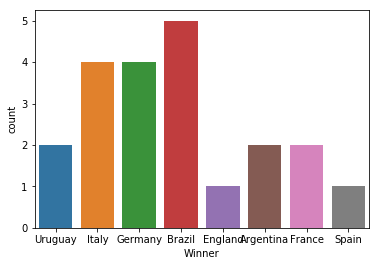

In [31]:
sns.countplot(x='Winner', data=winners)

- Đội bóng nhiều lần tham dự WC nhất

Home Team Name
Brazil       19
Italy        18
Germany      17
Argentina    15
Spain        14
England      14
France       13
Uruguay      12
Sweden       11
Mexico        9
Name: Year, dtype: int64


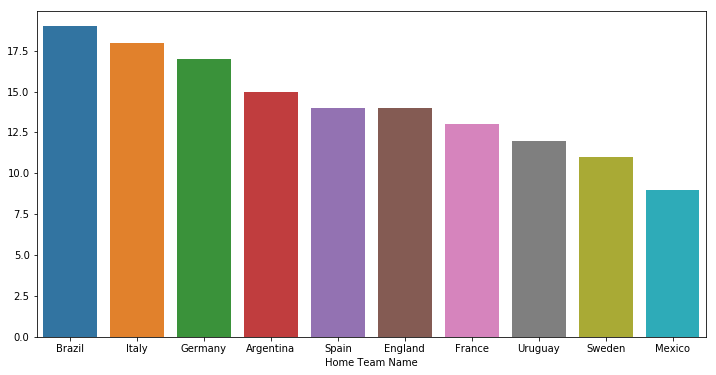

In [32]:
var=matches.groupby('Home Team Name')['Year'].nunique().sort_values(ascending= False).head(10)
f, axes=plt.subplots(figsize=(12,6))
print(var)
sns.barplot(x=var.index, y=var.values)

- Có đội bóng nào bảo vệ thành công chức vô địch ( 2 lần vô địch liên tiếp )

In [33]:
arr=winners.values
a=arr[:,:2]

for i in range(len(a)-1):
    if a[i,1]==a[i+1,1]:
        print(a[i,1])
# there is no team successfully defended  the championship

- Đội vừa là chủ nhà vừa vô địch

In [34]:
winners[winners['Country']==winners['Winner']]

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
7,1966,England,England,Germany,Portugal,Soviet,89,16,32,1563135
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753
10,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1545791
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2785100


- Các 5 trận đấu có nhiều cổ động viên nhất

In [35]:
matches[matches['Attendance']>50000][['Datetime','Stadium','Home Team Name','Away Team Name','Attendance']].sort_values('Attendance', ascending=False).head()

,Datetime,Stadium,Home Team Name,Away Team Name,Attendance
74,16 Jul 1950 - 15:00,Maracan� - Est�dio Jornalista M�rio Filho,Uruguay,Brazil,173850.0
71,13 Jul 1950 - 15:00,Maracan� - Est�dio Jornalista M�rio Filho,Brazil,Spain,152772.0
63,01 Jul 1950 - 15:00,Maracan� - Est�dio Jornalista M�rio Filho,Brazil,Yugoslavia,142429.0
70,09 Jul 1950 - 15:00,Maracan� - Est�dio Jornalista M�rio Filho,Brazil,Sweden,138886.0
379,07 Jun 1986 - 12:00,Estadio Azteca,Mexico,Paraguay,114600.0


- Các cầu thủ tham gia nhiều kì WC nhất

In [36]:
df=pd.concat([player[['RoundID','MatchID','Player Name']], matches[['Year','MatchID','RoundID']]], axis=1,join='inner')

In [37]:
print('Các cầu thủ tham gia nhiều kì WC nhất:')
df.groupby('Player Name')['Year'].nunique().sort_values(ascending=False).head()

Các cầu thủ tham gia nhiều kì WC nhất:


Player Name
Angel BOSSIO         5
Francisco VARALLO    5
Manuel FERREIRA      5
Pedro SUAREZ         5
Adolfo ZUMELZU       5
Name: Year, dtype: int64

- Quốc gia tổ chức nhiều kì WC nhất

In [38]:
winners['Country'].value_counts()

Germany        2
Italy          2
Brazil         2
France         2
Mexico         2
Korea/Japan    1
Spain          1
England        1
USA            1
Sweden         1
Russia         1
Switzerland    1
South          1
Argentina      1
Uruguay        1
Chile          1
Name: Country, dtype: int64

- Thành phố nào tổ chức nhiều trận đấu nhất

In [126]:
matches['City'].value_counts().head()

Mexico City        23
Montevideo         18
Guadalajara        17
Johannesburg       15
Rio De Janeiro     15
Name: City, dtype: int64

- Những cầu thủ ghi bàn nhiều nhất WC


In [40]:
def count_goal(x):
    return str(x).count('G')

goals=list(map(count_goal, player['Event'].values))

 Top 10 hunter: 
Player Name
KLOSE                                 17
RONALDO                               16
Just FONTAINE                         13
Gerd MUELLER                          13
PEL� (Edson Arantes do Nascimento)    12
Name: Total Goals, dtype: int64


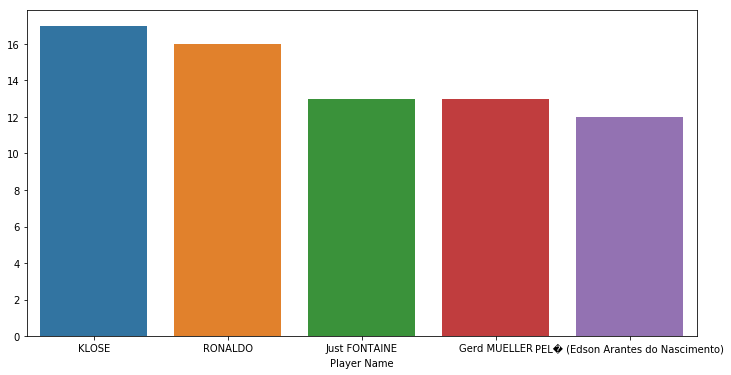

In [46]:
player['Total Goals']=goals
df=player.groupby('Player Name')['Total Goals'].sum().sort_values(ascending=False).head()

f,axes= plt.subplots(figsize=(12,6))
print(' Top 10 hunter: ')
print(df)
sns.barplot(x=df.index, y=df.values)

## How to know which is an attractive tournament

- So sánh tỉ lệ bàn thắng giữa các mùa

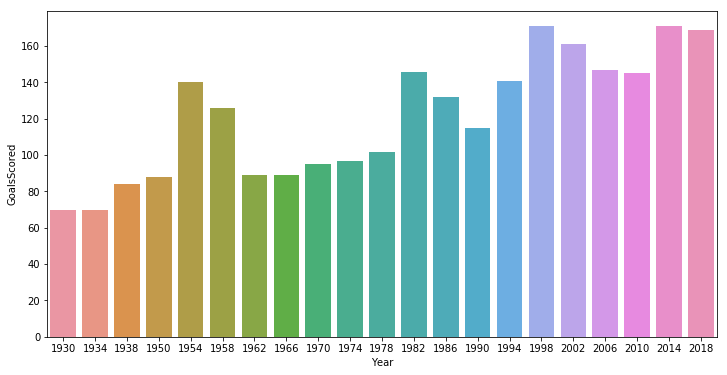

In [129]:
f, axes = plt.subplots(figsize=(12, 6))
sns.barplot(x='Year',y='GoalsScored',data=winners)


- Trung bình bàn thắng mỗi trận ở từng kì WC

Everage goals by year:
     Year  AverageGoals
0   1930      3.888889
1   1934      4.117647
2   1938      4.666667
3   1950      4.000000
4   1954      5.384615
5   1958      3.600000
6   1962      2.781250
7   1966      2.781250
8   1970      2.968750
9   1974      2.552632
10  1978      2.684211
11  1982      2.807692
12  1986      2.538462
13  1990      2.211538
14  1994      2.711538
15  1998      2.671875
16  2002      2.515625
17  2006      2.296875
18  2010      2.265625
19  2014      2.671875
20  2018      2.640625


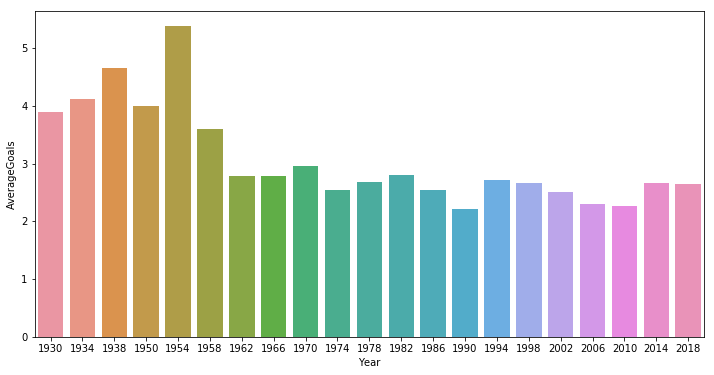

In [130]:
f, axes = plt.subplots(figsize=(12, 6))
aver=winners['GoalsScored']/winners['MatchesPlayed']
aver=pd.DataFrame({'Year':winners['Year'].values,'AverageGoals':aver.values})
print('Everage goals by year:\n', aver)
sns.barplot(x='Year',y='AverageGoals', data=aver)

- Trung bình các trận đấu có bàn thắng trên phút 85 ( trong giờ thi đấu chính thức thôi )

In [131]:
df=pd.concat([player[['RoundID','MatchID','Player Name','Event']], matches[['Year','MatchID','RoundID']]], axis=1,join='inner')

In [132]:
def countGoal(x):
    count=0
    var=df[df['Year']==x]['Event'].dropna().unique()
    for i in var:
        k=i.split()
        for j in k:
            s=j[1:len(j)-1]
            #print(s)
            if int(s)>80:
                count+=1
    return count
                
year=df['Year'].unique()
goal=list(map(countGoal,year))
goal=np.array(goal)
df=pd.DataFrame({'Year':year,'Goal':goal})

In [133]:
df

,Year,Goal
0,1930.0,1
1,1934.0,0
2,1938.0,0
3,1950.0,0
4,1954.0,0
5,1958.0,1
6,1962.0,1
7,1966.0,0
8,1970.0,1
9,1974.0,0


- Số trận được định đoạt bằng chỉ số phụ( Ngoài 90 phút thi đấu chính thức )

Year
1930.0    1
1934.0    3
1938.0    4
1950.0    1
1954.0    2
1958.0    2
1962.0    1
1966.0    2
1970.0    4
1974.0    1
1978.0    2
1982.0    2
1986.0    6
1990.0    8
1994.0    5
1998.0    5
2002.0    4
2006.0    7
2010.0    5
2014.0    8
Name: Win conditions, dtype: int64


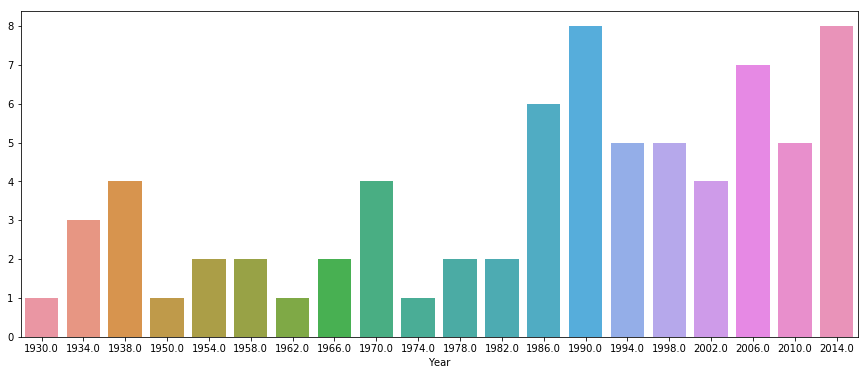

In [134]:
df=matches.groupby('Year')['Win conditions'].nunique()
print(df)
f, axes = plt.subplots(figsize=(15, 6))
sns.barplot(x=df.index, y=df.values, orient='v')

- Những bàn thắng sớm nhất lịch sử WC

- Những đội bóng có nhiều trận đấu nhất ở WC

In [135]:
LD=matches['Home Team Name'].value_counts()
LV=matches['Away Team Name'].value_counts()
LD=pd.DataFrame({'Name':LD.index,'NumberOfMatch':LD.values})
LV=pd.DataFrame({'Name':LV.index,'NumberOfMatch':LV.values})

df1=list(map(lambda x: LV[LV['Name']==x]['NumberOfMatch'].values[0], LD['Name']))
LD['NumberOfMatch']+=df1      


        Name  NumberOfMatch
1    Germany            106
0     Brazil            104
2      Italy             83
3  Argentina             77
4    England             62


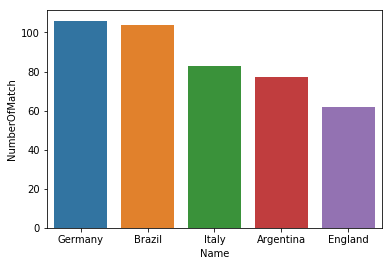

In [138]:
print(LD.sort_values(by='NumberOfMatch', ascending=False).head())
sns.barplot(x='Name', y='NumberOfMatch', data=LD.sort_values(by='NumberOfMatch', ascending=False).head())

## Thống kê thành tích của mỗi đội

In [139]:
name=matches['Home Team Name'].unique()

In [140]:
# kiểm tra số bàn thắng của một đội tuyển
goalByHome=list(map(lambda x: matches[matches['Home Team Name']==x]['Home Team Goals'].sum(), name))
lostGoalByHome=list(map(lambda x: matches[matches['Home Team Name']==x]['Away Team Goals'].sum(), name))
goalByGuest=list(map(lambda x: matches[matches['Away Team Name']==x]['Away Team Goals'].sum(), name))
lostGoalByGuest=list(map(lambda x: matches[matches['Away Team Name']==x]['Home Team Goals'].sum(), name))

In [141]:
df=pd.DataFrame({'Name':name,'Goals':goalByHome, 'Lost Goals':lostGoalByHome})
df['Goals']+=goalByGuest
df['Lost Goals']+=lostGoalByGuest

In [142]:
# Hàm thống kê số trận thắng, hòa, thua của đội tuyển x mà lúc này nó được xem là đội nhà
def matchHome(x):
    countWin=0
    countLosing=0
    countDraw=0
    var=matches[matches['Home Team Name']==x][['Home Team Goals','Away Team Goals','Win conditions']].values
    for i in var:
        if i[0]>i[1] or (len(i[2])>1 and i[2].split()[0]==x):
            countWin+=1
        elif i[0]==i[1] and len(i[2])==1:
            countDraw+=1
        else:
            countLosing+=1
            
    return [countWin, countLosing, countDraw]

# Hàm thống kê số trận thắng, hòa, thua của đội tuyển x mà lúc này nó được xem là đội khách
def matchGuest(x):
    countWin=0
    countLosing=0
    countDraw=0
    var=matches[matches['Away Team Name']==x][['Home Team Goals','Away Team Goals','Win conditions']].values
    for i in var:
        if i[0]<i[1] or (len(i[2])>1 and i[2].split()[0]==x):
            countWin+=1
        elif i[0]==i[1] and len(i[2])==1:
            countDraw+=1
        else:
            countLosing+=1
    return [countWin, countLosing, countDraw]


In [143]:
winMachesByHome=list(map(matchHome, name))
winMachesByGuest=list(map(matchGuest, name))

In [155]:
a=np.array(winMachesByHome)
b=np.array(winMachesByGuest)
var=a+b

# add new columns

df['Win']=var[:,0]
df['Lose']=var[:,1]
df['Draw']=var[:,2]


In [156]:
# extract to CSV for implementing GDS
df.to_csv('MatchOfEachTeam.csv', sep=',', encoding='utf-8')

- Top 5 đội bóng ghi bàn nhiều nhất ở WC

         Name  Goals
13    Germany  224.0
7      Brazil  221.0
4   Argentina  131.0
15      Italy  128.0
0      France  106.0


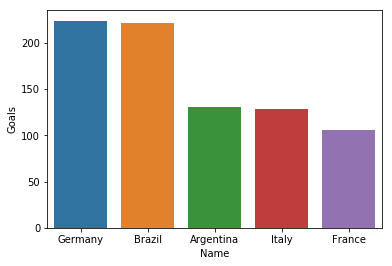

In [157]:
print(df[['Name','Goals']].sort_values(by='Goals',ascending=False).head())
sns.barplot(x='Name', y='Goals', data=df[['Name','Goals']].sort_values(by='Goals',ascending=False).head())


- Top đội bóng để thủng lưới nhiều bàn thắng WC

         Name  Lost Goals
13    Germany       121.0
7      Brazil       102.0
22     Mexico        92.0
25      Korea        88.0
4   Argentina        84.0
15      Italy        77.0
0      France        71.0
6     Uruguay        71.0
12     Sweden        69.0
27    Belgium        66.0


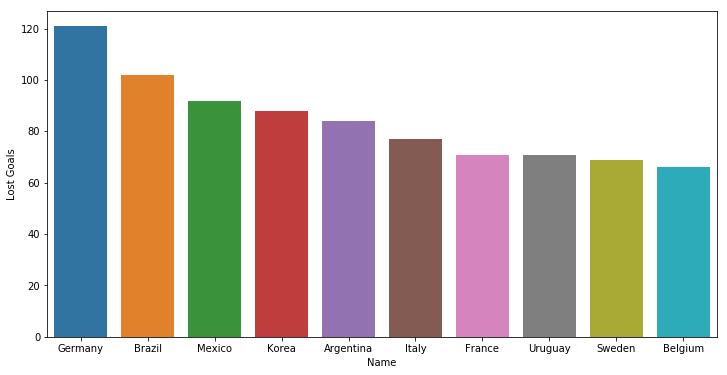

In [161]:
print(df[['Name','Lost Goals']].sort_values(by='Lost Goals',ascending=False).head(10))
f, axes= plt.subplots(figsize=(12,6))
sns.barplot(x='Name', y='Lost Goals', data=df[['Name','Lost Goals']].sort_values(by='Lost Goals',ascending=False).head(10))

- Top đội bóng có nhiều trận thắng nhất WC

           Name  Win
7        Brazil   73
13      Germany   68
15        Italy   46
4     Argentina   44
0        France   30
14        Spain   30
34  Netherlands   28
18      England   26
6       Uruguay   21
12       Sweden   17


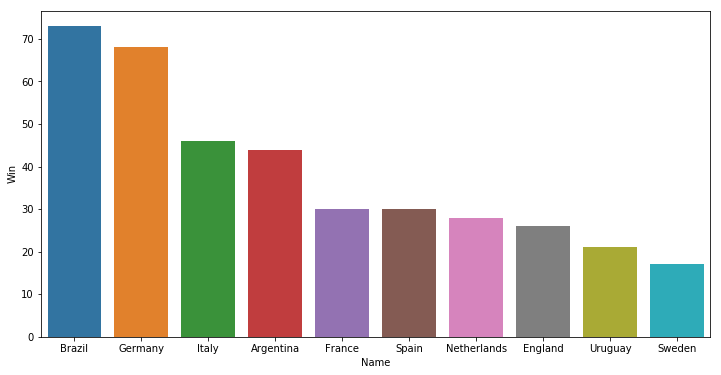

In [166]:
print(df[['Name','Win']].sort_values(by='Win',ascending=False).head(10))
f, axs=plt.subplots(figsize=(12,6))
sns.barplot(x='Name', y='Win', data=df[['Name','Win']].sort_values(by='Win',ascending=False).head(10))

- Top đội bóng có nhiều trận thua nhất WC

         Name  Lose
22     Mexico    27
4   Argentina    24
25      Korea    22
13    Germany    22
0      France    21
15      Italy    20
14      Spain    20
18    England    19
6     Uruguay    19
1         USA    19


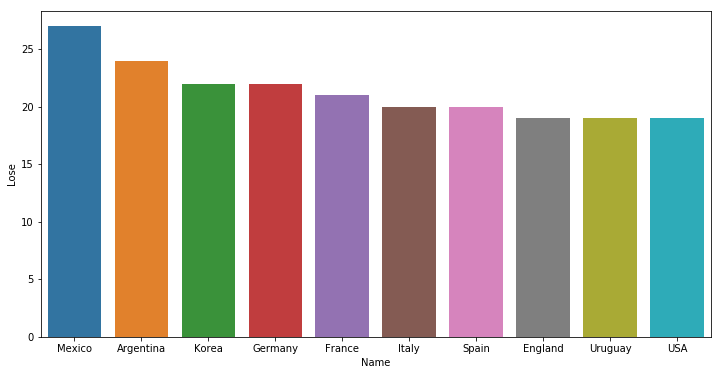

In [167]:
print(df[['Name','Lose']].sort_values(by='Lose',ascending=False).head(10))
f, axs=plt.subplots(figsize=(12,6))
sns.barplot(x='Name', y='Lose', data=df[['Name','Lose']].sort_values(by='Lose',ascending=False).head(10))

In [47]:
matches.to_csv('matchesEdit.csv', sep=',', encoding='utf-8')
player.to_csv('playerEdit.csv', sep=',', encoding='utf-8')
winners.to_csv('winnerEdit.csv',sep=',', encoding='utf-8')